In [1223]:
import tensorflow as tf

In [1224]:
mnist = tf.keras.datasets.mnist


In [1225]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [1226]:
x_train.shape

(60000, 28, 28)

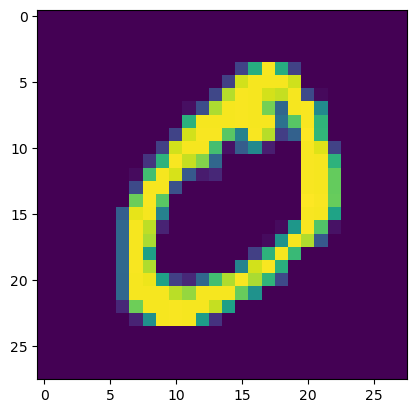

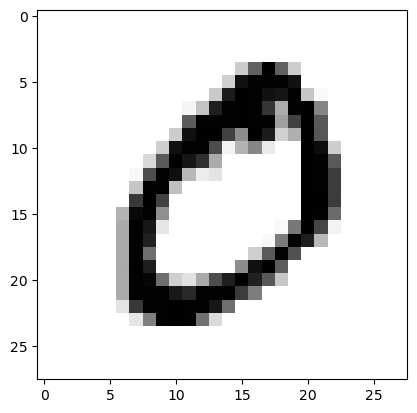

In [1227]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[1], cmap = plt.cm.binary)

In [1228]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

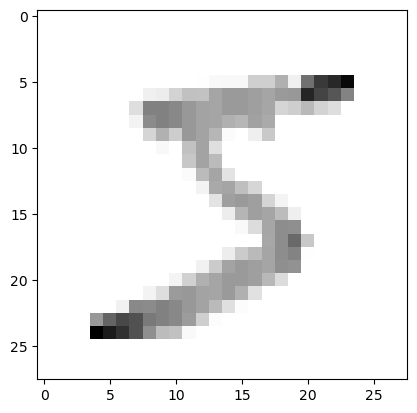

In [1229]:
#Normalizing data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [1230]:
import tensorflow as tf

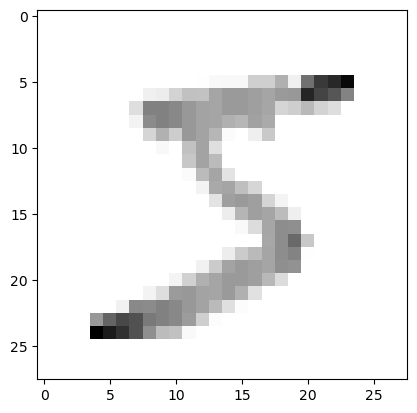

In [1231]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

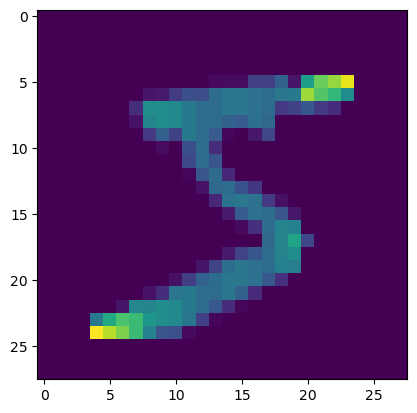

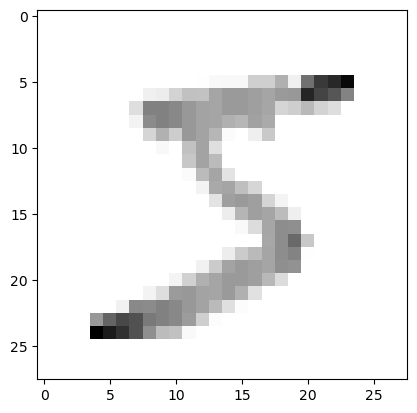

In [1232]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

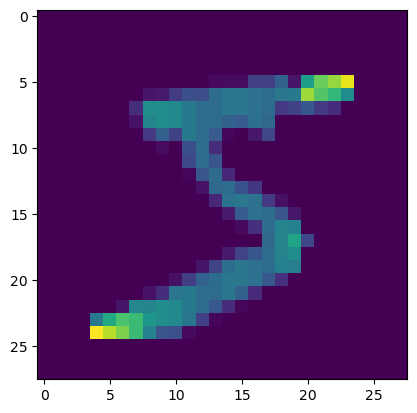

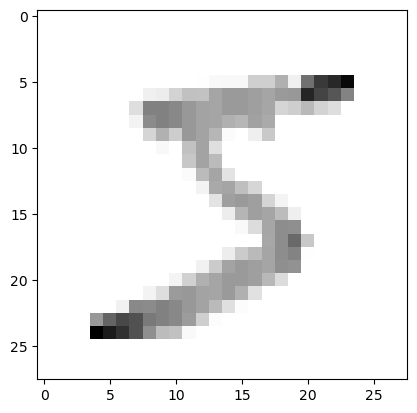

In [1233]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

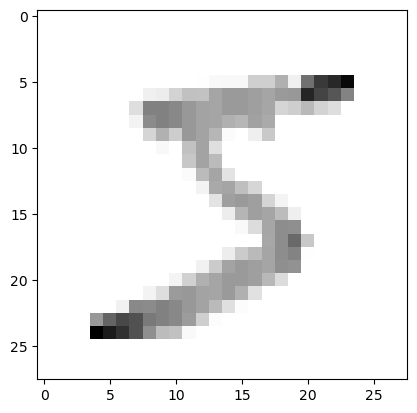

In [1234]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [1235]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [1236]:
print(y_train[0])


5


## Resizing image to make it suitable for applying Convolution Operation

In [1237]:
import numpy as np
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1) ## Increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) ## Increasing one dimension for kernel operation
print("Training Samples dimension", x_trainr.shape)
print("Training Samples dimension", x_testr.shape)


Training Samples dimension (60000, 28, 28, 1)
Training Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network

## Training on 60,000 samples of MNIST dataset

In [1238]:
from tensorflow.keras.models import Sequential

In [1239]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [1240]:
## Creating a Neural Model
model = Sequential()

## First convolutional layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) 
model.add(Activation("relu")) ## Activation Function
model.add(MaxPooling2D(pool_size=(2,2))) ## MaxPooling Layer

## Second convolutional layer
model.add(Conv2D(64, (3,3))) ## 2nd conv layer
model.add(Activation("relu")) ## Activation Function
model.add(MaxPooling2D(pool_size=(2,2))) ## MaxPooling Layer

## Third convolutional layer
model.add(Conv2D(64, (3,3))) ## 3rd conv layer
model.add(Activation("relu")) ## Activation Function
model.add(MaxPooling2D(pool_size=(2,2))) ## MaxPooling Layer

## Fully Connected Layer 1 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

## Fully Connected Layer 2 
model.add(Dense(32))
model.add(Activation("relu"))

## Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9) 
model.add(Dense(10))
model.add(Activation('softmax'))

#binary classification, one neuron

In [1241]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_96 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_97 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                               

In [1242]:
print("Total Training Samples =", len(x_trainr))

Total Training Samples = 60000


In [1243]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [1244]:
model.fit(x_trainr, y_train, epochs=7, validation_split = 0.3) ## Training the model

Epoch 1/7
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3308 - accuracy: 0.8964 - val_loss: 0.1493 - val_accuracy: 0.9558
Epoch 2/7
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1073 - accuracy: 0.9674 - val_loss: 0.0914 - val_accuracy: 0.9725
Epoch 3/7
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0778 - accuracy: 0.9759 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 4/7
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0598 - accuracy: 0.9809 - val_loss: 0.0660 - val_accuracy: 0.9792
Epoch 5/7
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.0678 - val_accuracy: 0.9807
Epoch 6/7
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0700 - val_accuracy: 0.9804
Epoch 7/7
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.0566 - val_accuracy:

In [1245]:
## Evaluating on MNIST testing dataset
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0532 - accuracy: 0.9861
Test loss on 10,000 test samples 0.05319608747959137
Validation Accuracy on 10,000 test samples 0.9861000180244446


In [1246]:
## Predictions 
predictions = model.predict([x_testr])

313/313 [==============================] - 1s 2ms/step


In [1247]:
print(predictions)

[[2.3136483e-10 3.1120231e-07 1.4041723e-07 ... 9.9999785e-01
  1.1568442e-09 6.3776668e-07]
 [9.2306067e-08 1.3860080e-06 9.9999654e-01 ... 1.1364289e-06
  6.8731237e-07 3.8204759e-10]
 [5.5440910e-09 9.9999917e-01 1.4397425e-07 ... 4.3459332e-07
  7.2005008e-08 9.0784795e-08]
 ...
 [2.9274659e-11 3.6686035e-07 4.2022217e-09 ... 4.2976442e-08
  2.1771379e-05 6.1481187e-06]
 [2.2350357e-06 1.2584406e-08 3.9853848e-10 ... 1.3542983e-08
  4.3810360e-06 1.3359888e-06]
 [1.2036943e-04 1.9823638e-06 1.4932825e-05 ... 3.1303009e-07
  2.9039231e-05 1.9039016e-05]]


In [1248]:
print(np.argmax(predictions[0]))

7


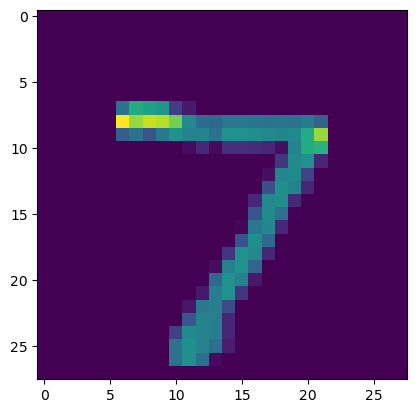

In [1249]:
plt.imshow(x_test[0])

In [1250]:
print(np.argmax(predictions[656]))

0


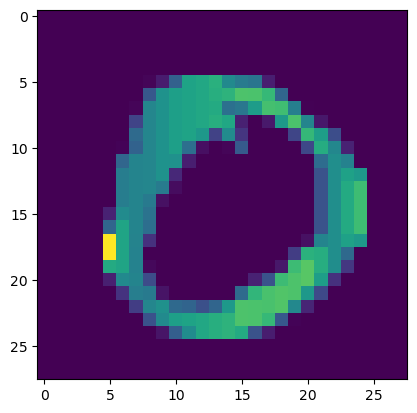

In [1251]:
plt.imshow(x_test[656])

In [1252]:
print(np.argmax(predictions[777]))

1


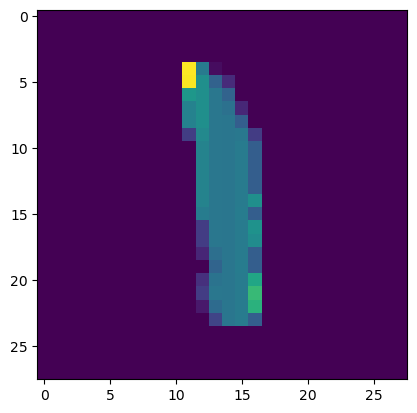

In [1253]:
plt.imshow(x_test[777])

In [1254]:
import cv2

In [1315]:
img = cv2.imread('two.png')

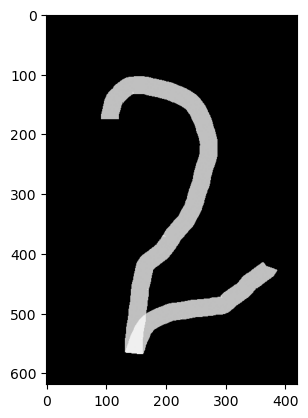

In [1316]:
plt.imshow(img)

In [1317]:
img.shape

(619, 420, 3)

In [1318]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [1319]:
gray.shape

(619, 420)

In [1320]:
resize = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [1321]:
resize.shape

(28, 28)

In [1322]:
newimg = tf.keras.utils.normalize (resize, axis = 1)

In [1323]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [1324]:
newimg.shape

(1, 28, 28, 1)

In [1325]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 65ms/step


In [1326]:
print (np.argmax(predictions))

2
